**ABOUT**


---

The aim of the project is to predict hotel reservation cancellations using data from the Hotel Reservations Dataset on the Kaggle platform. Laptop basic data analysis (EDA) involving descriptive statistics and plotting of graphs, trying different machine learning models for booking cancellation prediction, inferring the resulting scoring models, EDA and graphs, and provide recommendations to optimize the booking process and reduce future booking cancellations.



#Collecting Data

In [ ]:
#import libary
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas import read_csv
from pandas import datetime # xử lý dữ liệu về ngày tháng
plt.rcParams.update({'figure.figsize':(20,25), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau

<ipython-input-1-fb6d23efb911>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime # xử lý dữ liệu về ngày tháng


In [ ]:
#link data
link = 'https://drive.google.com/file/d/1UprIC1PBsCUx3XHhAfDmTkoe4phtByFZ/view?usp=sharing'

In [ ]:
#load data
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df_reserve = pd.read_csv(path,encoding= 'unicode_escape')

#EDA

In [ ]:
df = df_reserve.copy()

In [ ]:
df.columns #Columns in dataset

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
df.isna().sum() #Numbers of NaN

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

You can clearly see that no missing values on columns in dataset

In [ ]:
df.sample(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
9804,INN09805,2,0,0,3,Meal Plan 1,1,Room_Type 1,65,2018,6,21,Online,0,0,0,99.90,0,Not_Canceled
20078,INN20079,2,0,0,2,Meal Plan 1,0,Room_Type 1,57,2018,11,18,Online,0,0,0,93.60,1,Canceled
6489,INN06490,2,0,1,0,Meal Plan 1,0,Room_Type 1,263,2017,9,21,Offline,0,0,0,67.00,0,Not_Canceled
12305,INN12306,2,0,1,2,Meal Plan 1,0,Room_Type 1,101,2018,10,24,Online,0,0,0,100.20,4,Not_Canceled
15321,INN15322,1,0,1,2,Meal Plan 1,0,Room_Type 6,63,2018,11,7,Online,0,0,0,193.68,0,Not_Canceled
24563,INN24564,2,0,2,2,Meal Plan 1,0,Room_Type 1,20,2018,8,19,Online,0,0,0,151.00,1,Not_Canceled
3742,INN03743,1,0,0,3,Meal Plan 2,0,Room_Type 1,36,2017,10,13,Offline,0,0,0,91.00,0,Not_Canceled
22482,INN22483,0,2,0,3,Meal Plan 1,0,Room_Type 2,1,2017,12,23,Online,0,0,0,6.00,0,Not_Canceled
35852,INN35853,2,0,1,4,Meal Plan 1,0,Room_Type 1,135,2018,5,9,Online,0,0,0,79.72,1,Canceled
35457,INN35458,2,0,2,1,Meal Plan 1,0,Room_Type 1,221,2017,10,17,Offline,0,0,0,65.00,0,Not_Canceled


In [ ]:
#view data
#df
df.info() #data infomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
#Estimate primary statistics
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


+ Dữ liệu có 36275 rows x 19 columns
+ Không có dữ liệu Nan trong các cột
+ Thông tin các cột:
  + Booking_ID: Mã đặt phòng
  + no_of_adults: Số người lớn
  + no_of_children: Số trẻ em
  + no_of_weekend_nights: Số đêm cuối tuần
  + no_of_week_nights: Số đêm trong tuần
  + type_of_meal_plan: Loại kế hoạch ăn uống
  + required_car_parking_space: Số chỗ đậu xe yêu cầu
  + room_type_reserved: Loại phòng đã đặt
  + lead_time: Thời gian đặt trước (số ngày)
  + arrival_year: Năm đến
  + arrival_month: Tháng đến
  + arrival_date: Ngày đến
  + market_segment_type: Loại đối tượng thị trường
  + repeated_guest: Khách hàng đã từng đặt trước đây
  + no_of_previous_cancellations: Số lần hủy đặt phòng trước đó
  + no_of_previous_bookings_not_canceled: Số lần đặt trước đó không bị hủy
  + avg_price_per_room: Giá trung bình mỗi phòng
  + no_of_special_requests: Số yêu cầu đặc biệt
  + booking_status: Trạng thái (Canceled: Đã hủy, Not_Canceled: Chưa hủy)

In [ ]:
#tỷ lệ của các category
print(df.groupby('booking_status').size())
print(df.groupby('type_of_meal_plan').size())
print(df.groupby('market_segment_type').size())
print(df.groupby('repeated_guest').size())

booking_status
Canceled        11885
Not_Canceled    24390
dtype: int64
type_of_meal_plan
Meal Plan 1     27835
Meal Plan 2      3305
Meal Plan 3         5
Not Selected     5130
dtype: int64
market_segment_type
Aviation           125
Complementary      391
Corporate         2017
Offline          10528
Online           23214
dtype: int64
repeated_guest
0    35345
1      930
dtype: int64


In [ ]:
# Feature
numeric = ['avg_price_per_room']
datetime = ['lead_time','arrival_year', 'arrival_month','arrival_date']
categorical = ['type_of_meal_plan','market_segment_type','no_of_adults', 'no_of_children', 'no_of_weekend_nights','no_of_week_nights', 'required_car_parking_space','no_of_special_requests','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','repeated_guest','room_type_reserved']
target = 'booking_status'

In [ ]:
#Số feature
df[categorical].shape

(36275, 12)

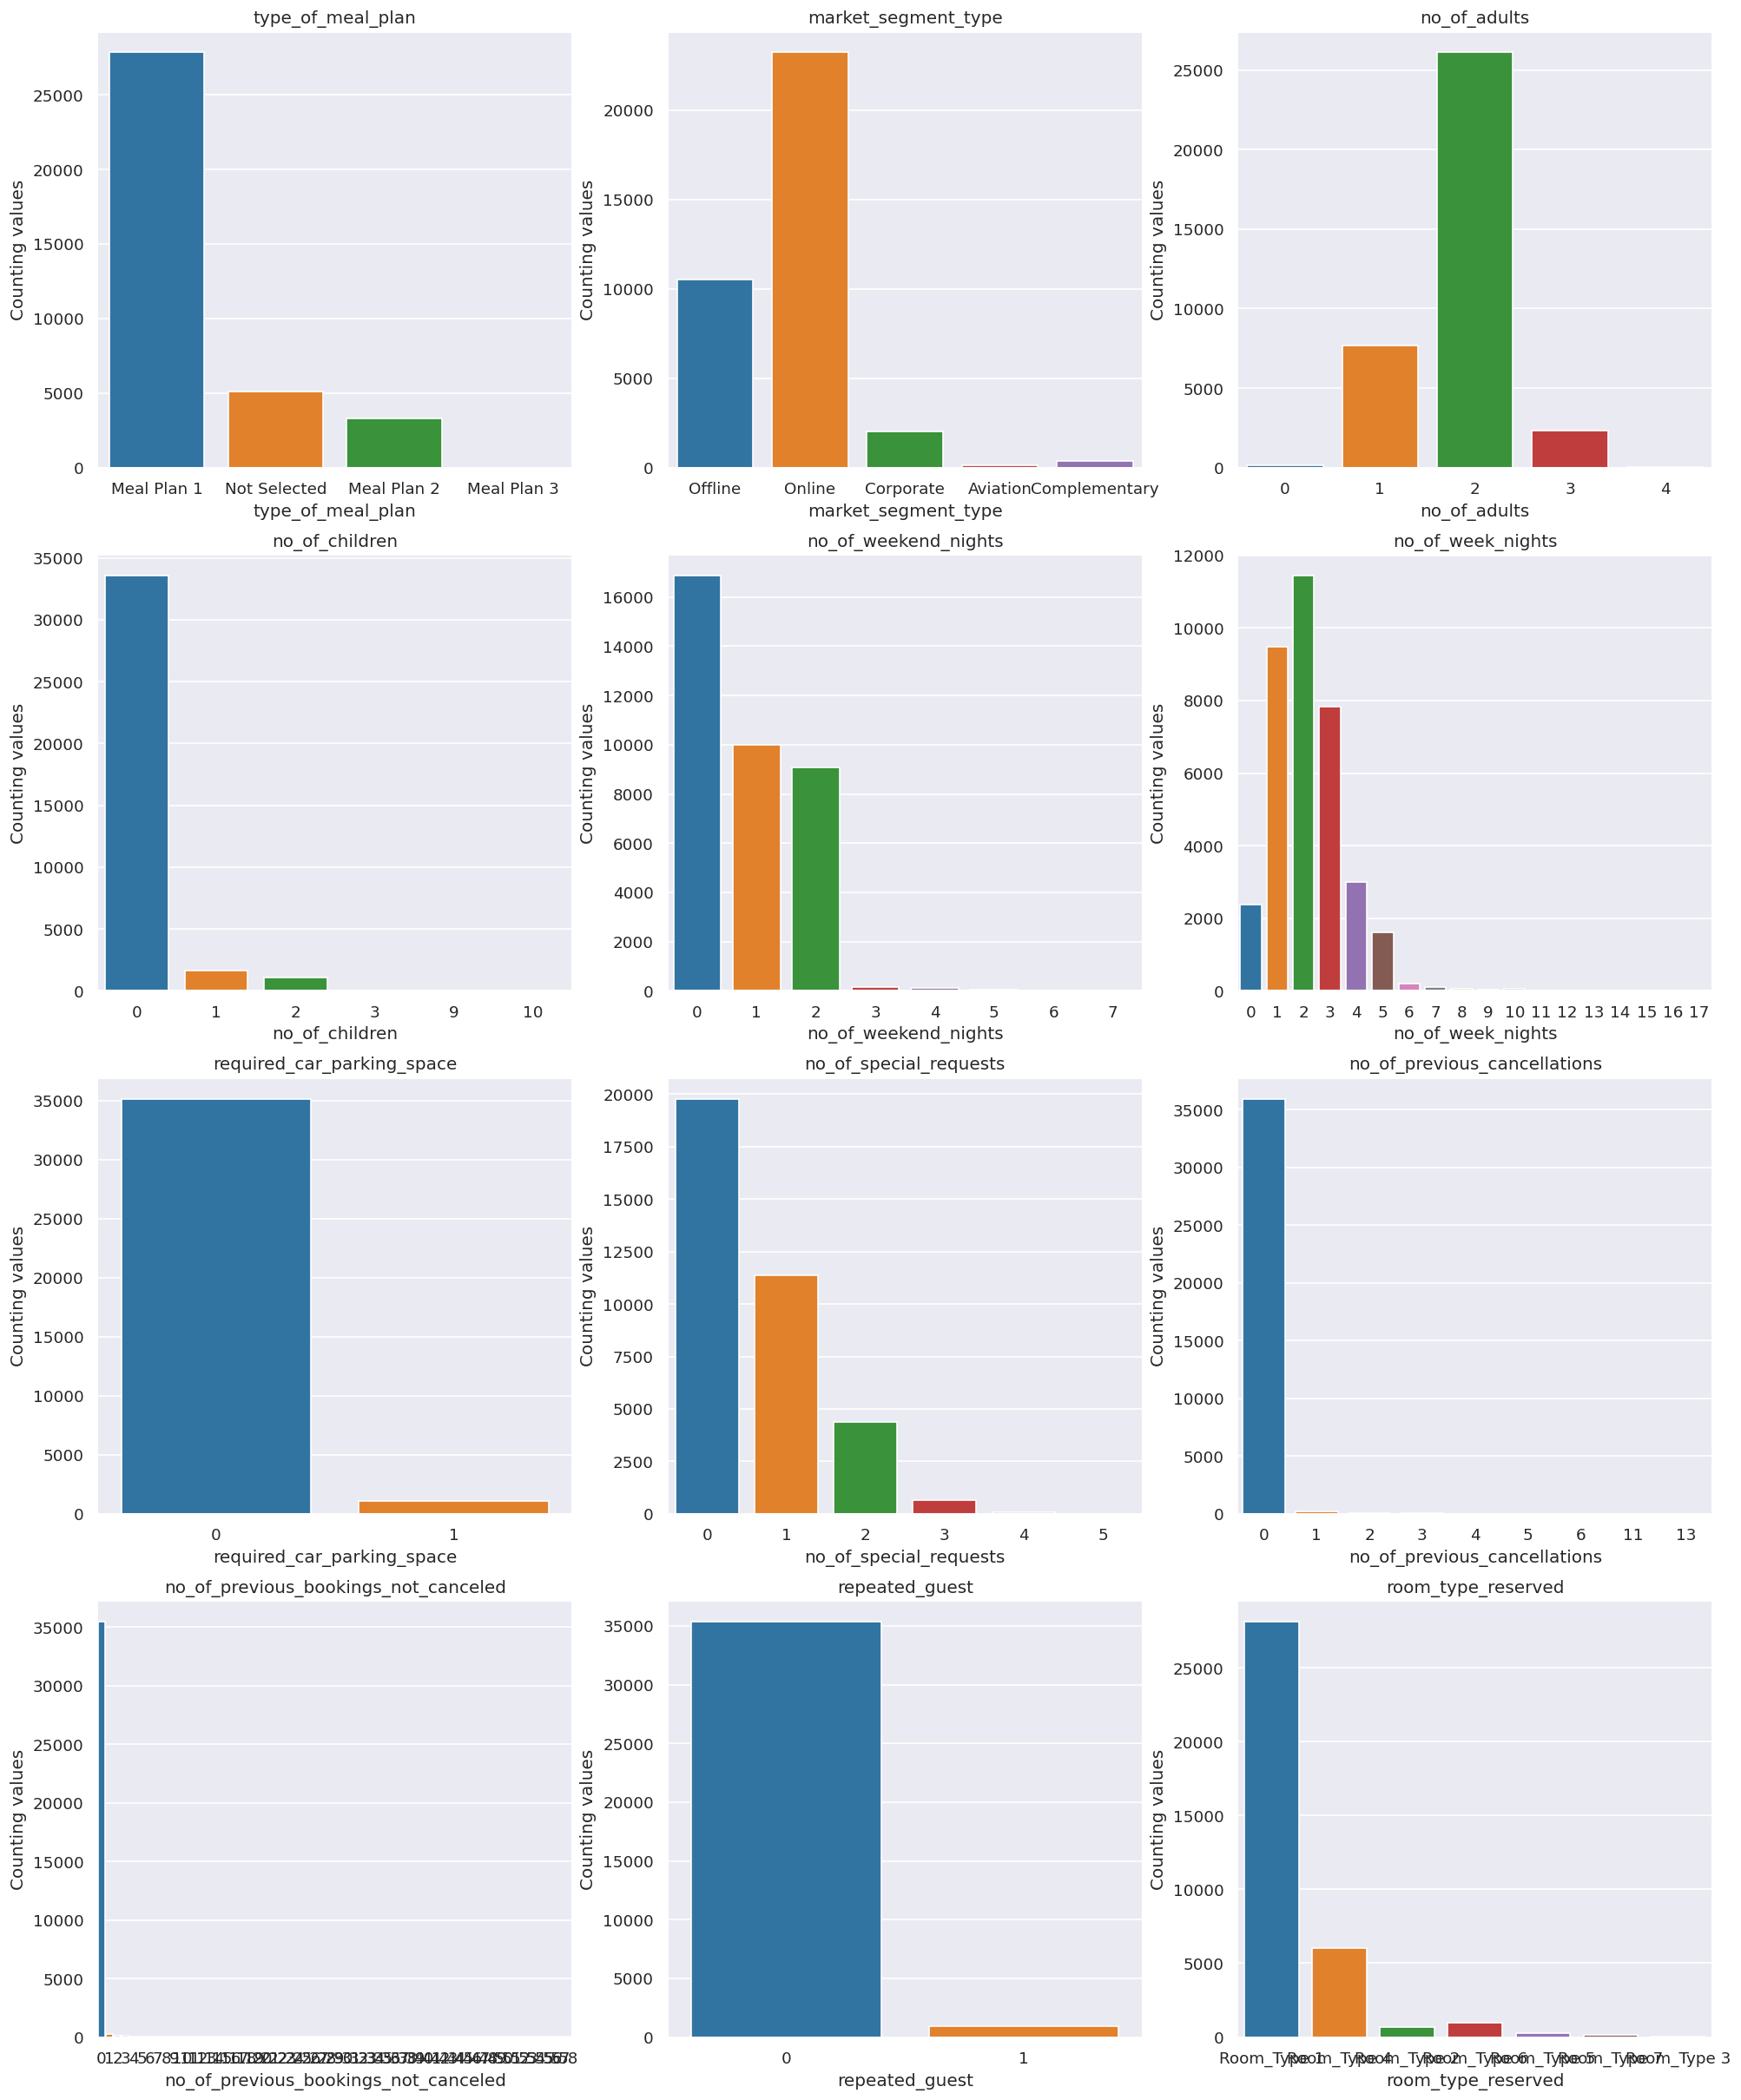

In [ ]:
# Look at the categorical data
a = 1
for x in df[categorical]:
  plt.subplot(4,3,a)
  plt.gca().set_title(x)
  sns.countplot(x = x, palette = 'tab10', data = df)
  plt.ylabel('Counting values')
  a += 1


Room type 1 is taken the most, much more than all other room types, we can say that the average price of room type 1 -- 103.423539 euros or 103.42 euros * 80 rubles/euro = 8273.6 rubles.

No one practically takes a parking space

Among meal plans they choose 1 or no meal plan, even less often 2 and not at all 3.

Among the number of weekend and weekly nights, nothing unusual, i.e. most people take a hotel for one week plus one couple of weekends.

Among those who visit, they are most likely to be M+W couples without children (assumption).

**Let's see which months have the most bookings and which bookings are popular in certain months**

Text(-2.6916666666666798, 0.5, 'Number of bookings')

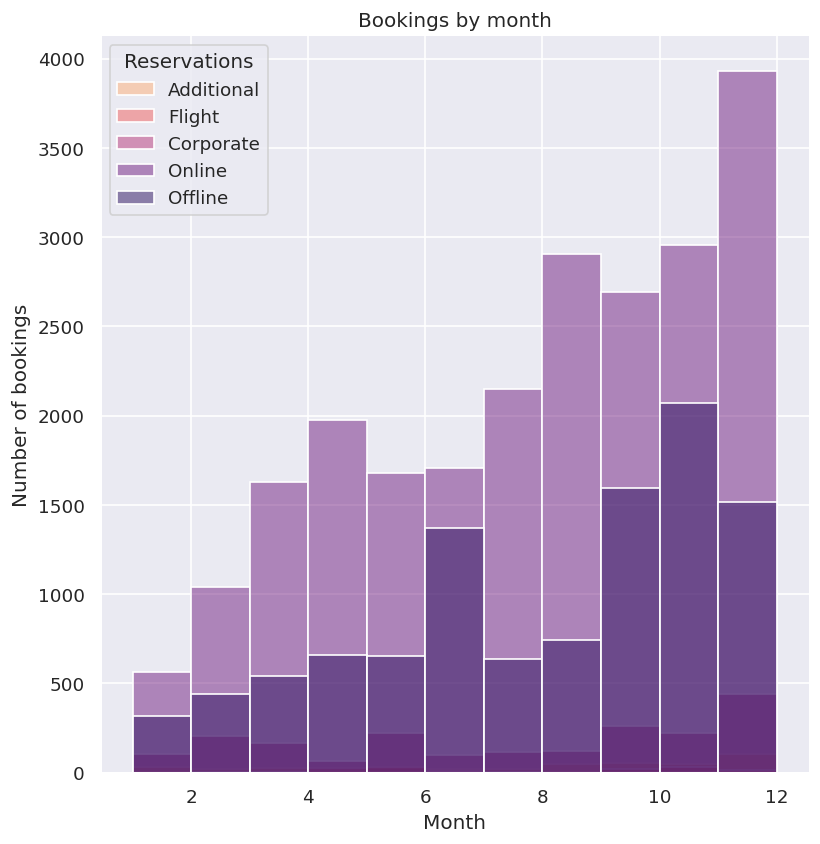

In [ ]:
sns.displot(df, x='arrival_month', binwidth=1, height=7, palette='magma', hue='market_segment_type', legend = False)
plt.gca().set_title('Bookings by month')
plt.legend(title= 'Reservations',
           labels=['Additional','Flight','Corporate','Online','Offline'])
plt.xlabel('Month')
plt.ylabel('Number of bookings')

The peak booking time is from August to December. This period falls during the winter season, which may not be the ideal time for traveling, but it is the perfect time to plan for upcoming spring and summer trips.

In [ ]:
#Calculate Cancellation Rate
value = df["booking_status"].value_counts()
rate = value.sum()
value*100/rate

Not_Canceled    67.236389
Canceled        32.763611
Name: booking_status, dtype: float64

In [ ]:
#Convert the data to a numeric equivalent
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

**Let's see the correlation between features, maybe we can find interesting insights and visualize them**

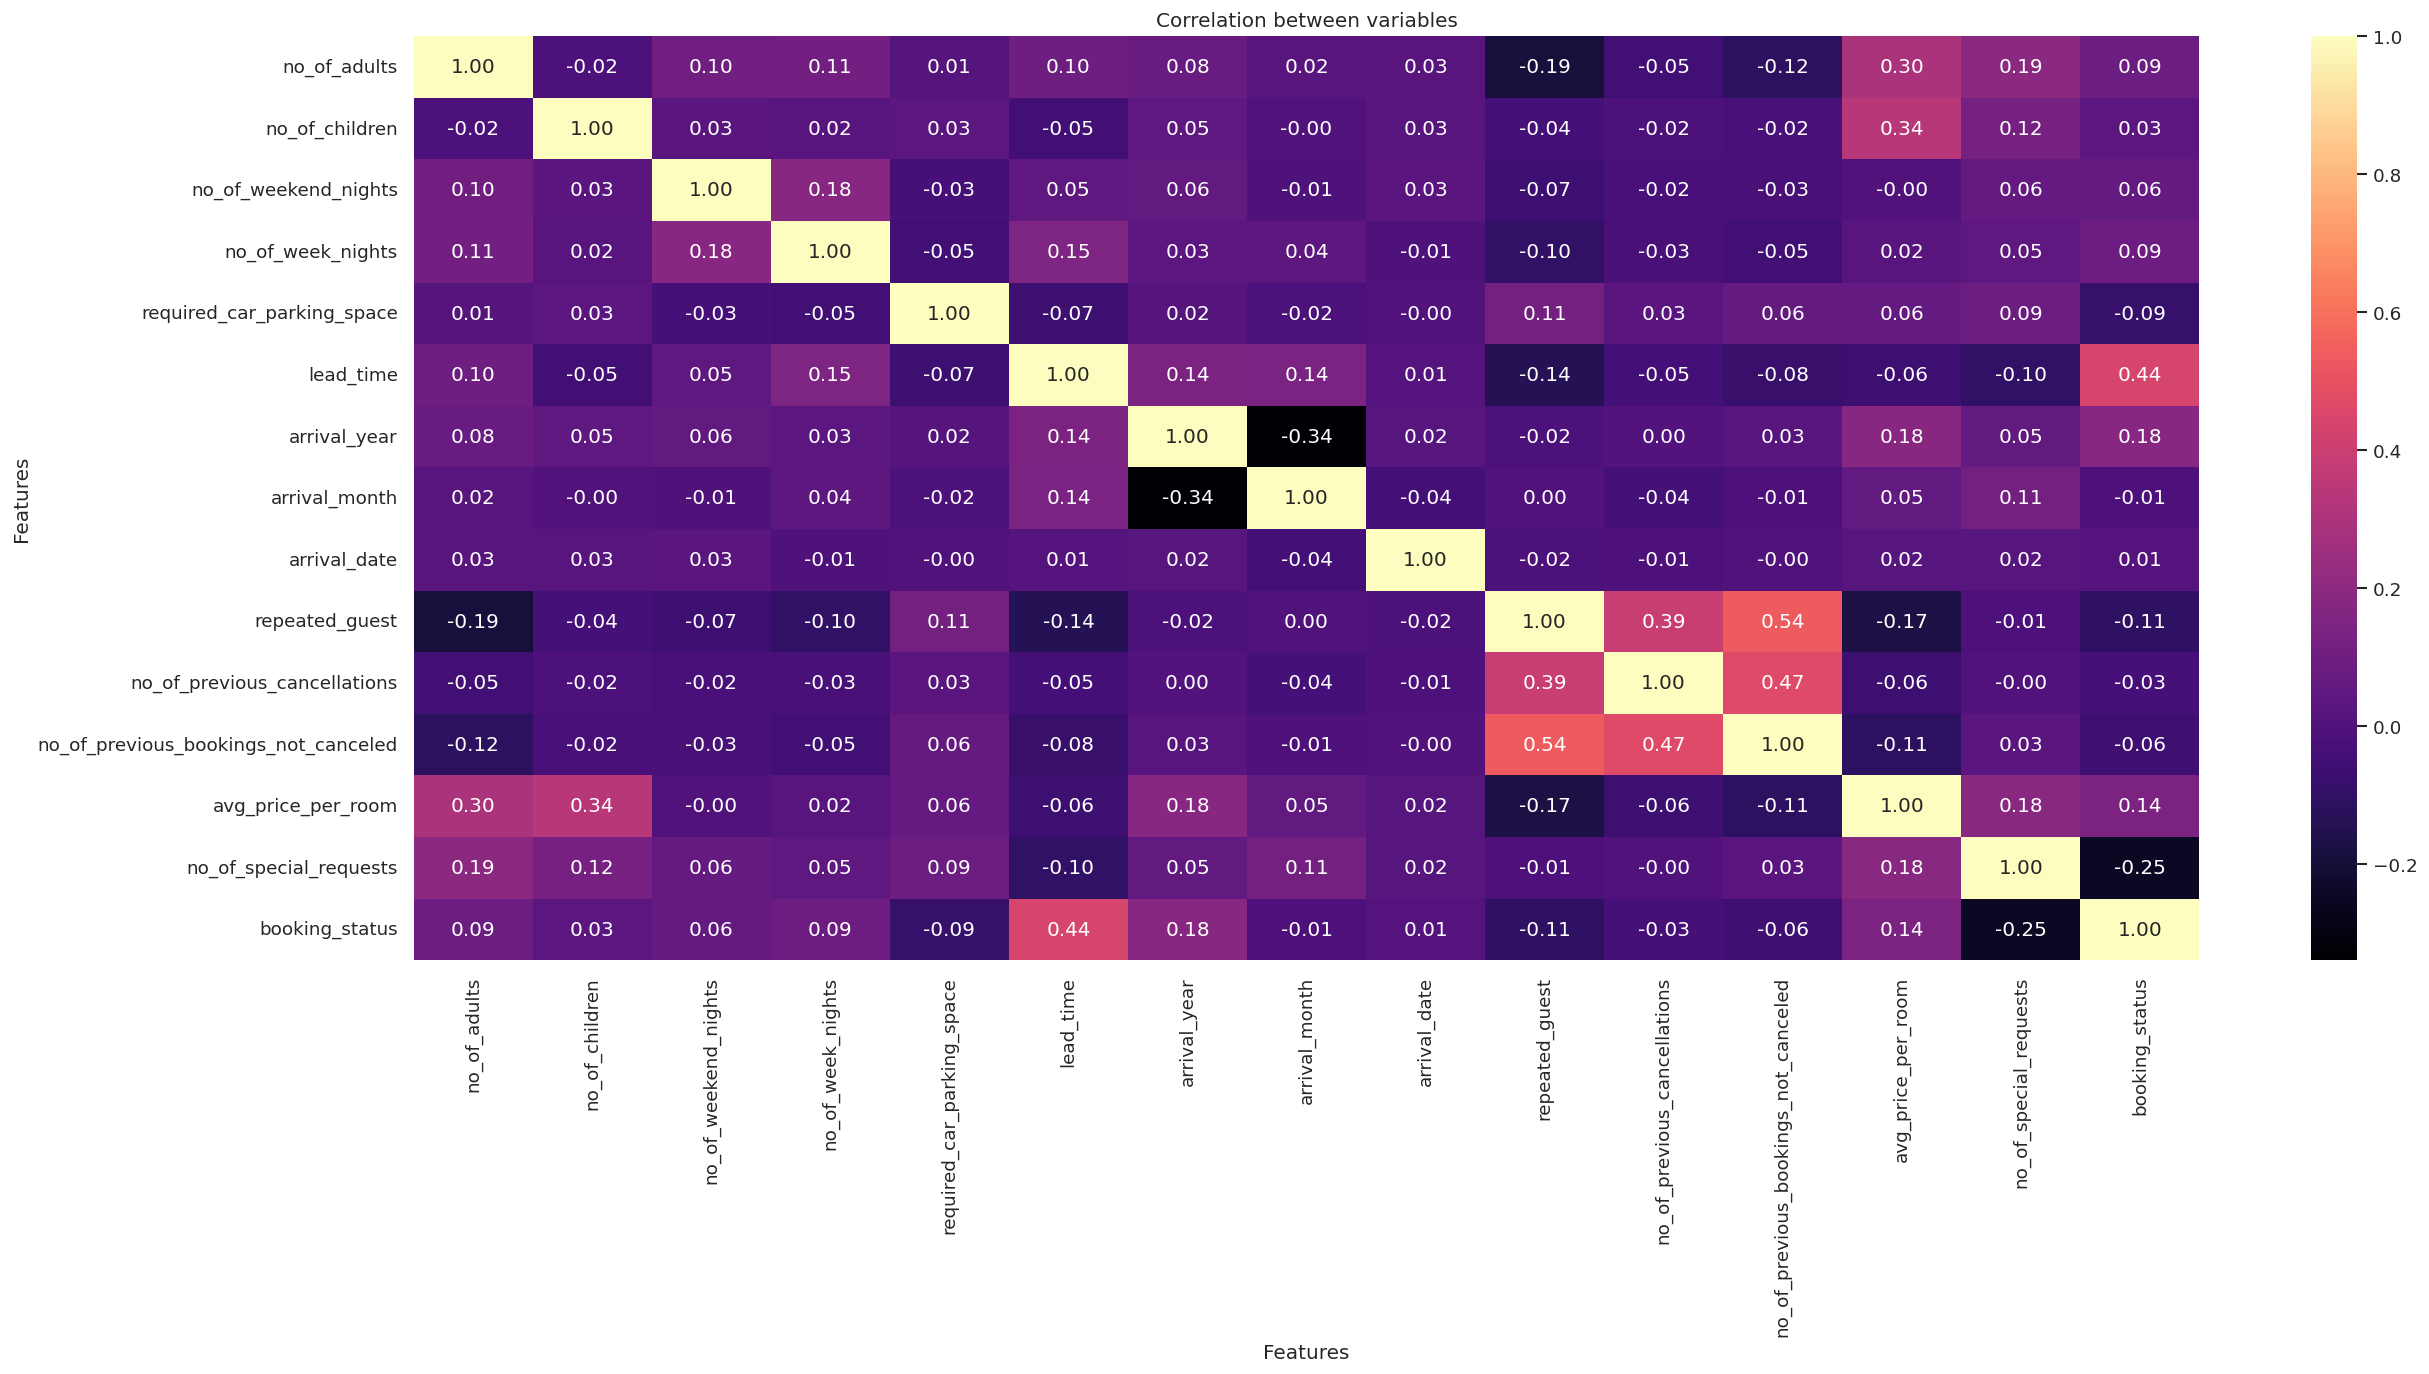

In [ ]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('Correlation between variables')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [ ]:
#highlight correlation is seen
#lead_time / booking_status
#no_of_previous_cancellations / repeated_guest
#no_of_previous_bookings_not_canceled / repeated_guest

**There is a relationship between "number of days between booking date and hotel arrival date" and "whether the booking was canceled or not". #lead_time / booking_status**

Text(0, 0.5, 'Days between booking and arrival')

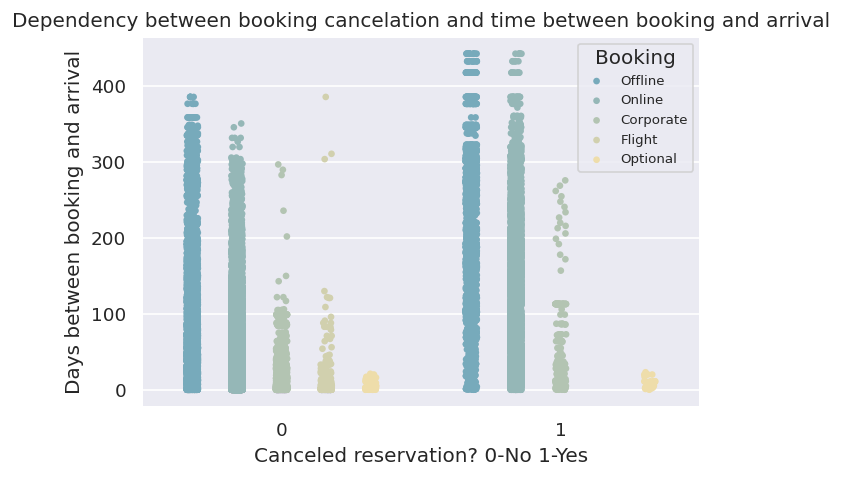

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
stp = sns.stripplot(data=df, x="booking_status", y="lead_time", hue="market_segment_type", jitter = True, dodge = True, palette = 'blend:#7AB,#EDA', size = 4)
plt.gca().set_title('Dependency between booking cancelation and time between booking and arrival')
labels_dict = {0:'Offline', 1:'Online', 2:'Corporate', 3:'Flight', 4:'Optional'}
plt.legend(loc='upper right', title='Booking',labels=labels_dict.values(), prop={'size': 8})
stp.set_xlabel('Canceled reservation? 0-No 1-Yes')
stp.set_ylabel('Days between booking and arrival')

Offline bookings are generally considered more reliable as they are less likely to be canceled or affected compared to online bookings. Surprisingly, the number of days between the booking date and the arrival date has little impact on the likelihood of a booking being canceled. Although it may seem that the more days in advance you book, the higher the chances of cancellation due to personal factors like changing plans, etc., in practice, it doesn't have much effect.

**Since we took the time between booking and arrival, it's certainly interesting to see how that affects the price of the room**

Text(38.12500000000001, 0.5, 'Average price per room')

<Figure size 720x480 with 0 Axes>

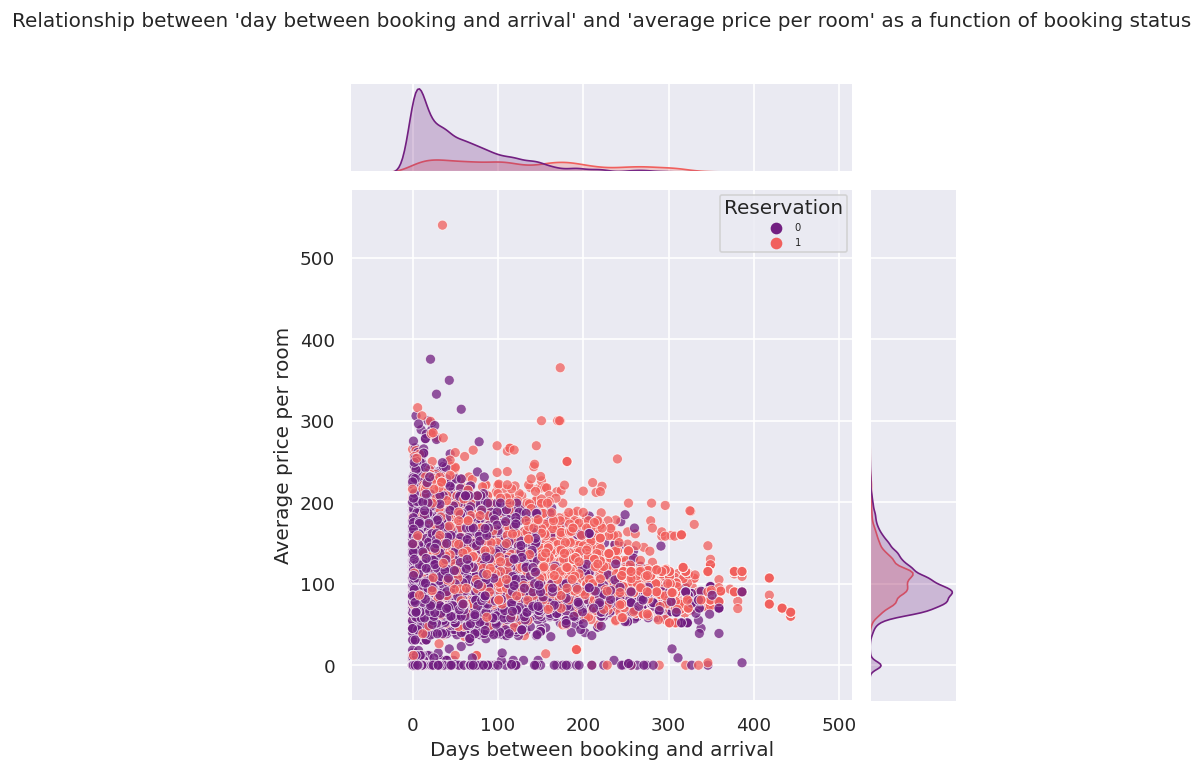

In [ ]:
plt.figure(figsize=(6, 4), dpi=120)
jnt = sns.jointplot(data=df, x='lead_time', y='avg_price_per_room',
              hue='booking_status', alpha=0.75, palette = 'magma')
plt.gca().set_title('Relationship between \'day between booking and arrival\' and \'average price per room\' as a function of booking status', y=1.3)
plt.legend(loc='upper right', title='Reservation', prop={'size': 6})
jnt.ax_joint.set_xlabel('Days between booking and arrival')
jnt.ax_joint.set_ylabel('Average price per room')

As mentioned above, the price range of around 100 euros is where the highest number of bookings occur. Additionally, it is evident that there are more cancellations starting at around one hundred days and one hundred euros. Therefore, we can say that there is a correlation between the room price and the number of days from the booking date to the arrival date. In other words, the more expensive the room and the longer the duration between the booking and arrival, the higher the likelihood of cancellation.

**I think it's also interesting to look at #no_of_previous_bookings_not_canceled / repeated_guest, so let's try to plot a graph and see what correlates where**

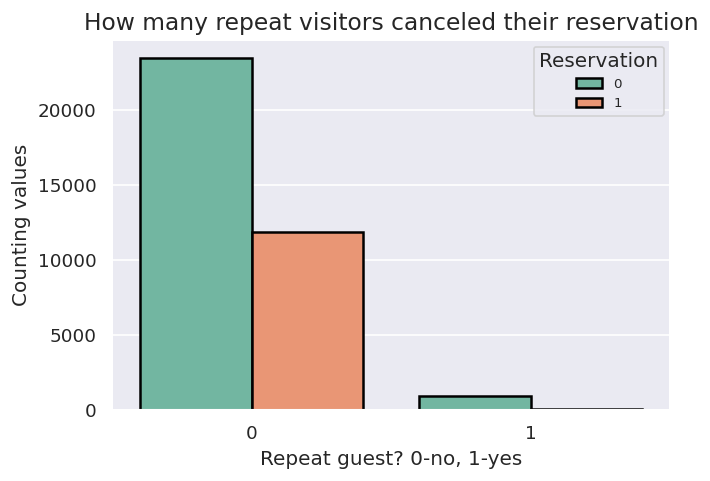

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax = sns.countplot(x="repeated_guest", hue="booking_status", data=df, palette="Set2", edgecolor='black', linewidth=1.5)

ax.set_xlabel('Repeat guest? 0-no, 1-yes', fontsize=12)
ax.set_ylabel('Counting values', fontsize=12)
ax.set_title('How many repeat visitors canceled their reservation', fontsize=14)
plt.legend(loc='upper right', title='Reservation', prop={'size': 8})

plt.show()

From the chart, it can be noticed that returning customers have fewer cancellations than new customers.

Additionally, it is also evident that there is a significant proportion between new and repeat customers. More details can be examined through the following chart.

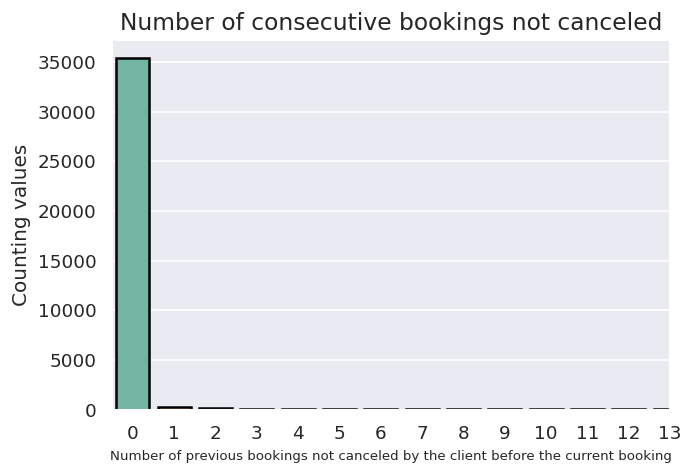

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax = sns.countplot(x="no_of_previous_bookings_not_canceled", data=df, palette="Set2", edgecolor='black', linewidth=1.5)
ax.set_xlim(right=13)

ax.set_xlabel('Number of previous bookings not canceled by the client before the current booking', fontsize=8)
ax.set_ylabel('Counting values', fontsize=12)
ax.set_title('Number of consecutive bookings not canceled', fontsize=14)

plt.show()

Very few "successful" bookings are made in a row by a single customer, which can speak of their loyalty and trust in the brand.

#Preprocessing

In [ ]:
# Drop datetime columns
df = df.drop(columns=['arrival_year', 'arrival_month', 'arrival_date'])
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,1


In [ ]:
df[categorical] = df[categorical].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  object 
 2   no_of_children                        36275 non-null  object 
 3   no_of_weekend_nights                  36275 non-null  object 
 4   no_of_week_nights                     36275 non-null  object 
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  object 
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   market_segment_type                   36275 non-null  object 
 10  repeated_guest                        36275 non-null  object 
 11  no_of_previous_

In [ ]:
df[categorical]

,type_of_meal_plan,market_segment_type,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,no_of_special_requests,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,repeated_guest,room_type_reserved
0,Meal Plan 1,Offline,2,0,1,2,0,0,0,0,0,Room_Type 1
1,Not Selected,Online,2,0,2,3,0,1,0,0,0,Room_Type 1
2,Meal Plan 1,Online,1,0,2,1,0,0,0,0,0,Room_Type 1
3,Meal Plan 1,Online,2,0,0,2,0,0,0,0,0,Room_Type 1
4,Not Selected,Online,2,0,1,1,0,0,0,0,0,Room_Type 1
...,...,...,...,...,...,...,...,...,...,...,...,...
36270,Meal Plan 1,Online,3,0,2,6,0,1,0,0,0,Room_Type 4
36271,Meal Plan 1,Online,2,0,1,3,0,2,0,0,0,Room_Type 1
36272,Meal Plan 1,Online,2,0,2,6,0,2,0,0,0,Room_Type 1
36273,Not Selected,Online,2,0,0,3,0,0,0,0,0,Room_Type 1


In [ ]:
# One-hot encoding using pandas
#df[categorical] = df[categorical].apply(lambda x: pd.get_dummies(x))


In [ ]:
# One-hot encoding using pandas
df_encode = pd.get_dummies(df[categorical])
df_encode

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,no_of_adults_0,...,no_of_previous_bookings_not_canceled_9,repeated_guest_0,repeated_guest_1,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
36271,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
36272,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
36273,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
# Drop categorical columns then replace one hot encode
df = df.drop(categorical,axis=1)
df = pd.concat([df,df_encode],axis=1)

In [ ]:
df.sample(1)

,Booking_ID,lead_time,avg_price_per_room,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Aviation,market_segment_type_Complementary,...,no_of_previous_bookings_not_canceled_9,repeated_guest_0,repeated_guest_1,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
26458,INN26459,12,128.0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


#Data Segmentation

In [ ]:
# create a copy data
df_seg = df.copy()


In [ ]:
#drop booking id and booking status
df_seg = df_seg.drop(['Booking_ID','booking_status'],axis=1)

In [ ]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Columns: 133 entries, lead_time to room_type_reserved_Room_Type 7
dtypes: float64(1), int64(1), uint8(131)
memory usage: 5.1 MB


All features are now numerical. Then, we scaled data.

In [ ]:
# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_seg) # Transform data để phù hợp với đầu vào của các hàm tính toán dưới đây
df_seg = pd.DataFrame(scaled_features)
df_seg

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,1.614896,-1.095033,0.550650,-0.316611,-0.011741,-0.405849,-0.058803,-0.104385,-0.242645,1.563833,...,-0.022892,0.16221,-0.16221,0.538097,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141
1,-0.933701,0.092806,-1.816036,-0.316611,-0.011741,2.463970,-0.058803,-0.104385,-0.242645,-0.639454,...,-0.022892,0.16221,-0.16221,0.538097,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141
2,-0.980250,-1.237528,0.550650,-0.316611,-0.011741,-0.405849,-0.058803,-0.104385,-0.242645,-0.639454,...,-0.022892,0.16221,-0.16221,0.538097,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141
3,1.463610,-0.097567,0.550650,-0.316611,-0.011741,-0.405849,-0.058803,-0.104385,-0.242645,-0.639454,...,-0.022892,0.16221,-0.16221,0.538097,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141
4,-0.433291,-0.254312,-1.816036,-0.316611,-0.011741,2.463970,-0.058803,-0.104385,-0.242645,-0.639454,...,-0.022892,0.16221,-0.16221,0.538097,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,-0.002706,1.834665,0.550650,-0.316611,-0.011741,-0.405849,-0.058803,-0.104385,-0.242645,-0.639454,...,-0.022892,0.16221,-0.16221,-1.858401,-0.139454,-0.013893,2.233593,-0.085785,-0.165404,-0.066141
36271,1.661446,-0.355483,0.550650,-0.316611,-0.011741,-0.405849,-0.058803,-0.104385,-0.242645,-0.639454,...,-0.022892,0.16221,-0.16221,0.538097,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141
36272,0.730452,-0.143451,0.550650,-0.316611,-0.011741,-0.405849,-0.058803,-0.104385,-0.242645,-0.639454,...,-0.022892,0.16221,-0.16221,0.538097,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141
36273,-0.258730,-0.254312,-1.816036,-0.316611,-0.011741,2.463970,-0.058803,-0.104385,-0.242645,-0.639454,...,-0.022892,0.16221,-0.16221,0.538097,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141


+ All features are now scaled

+ Dataframe to be used for further modelling

[0.04036155 0.02769105 0.01907953 0.01804739]


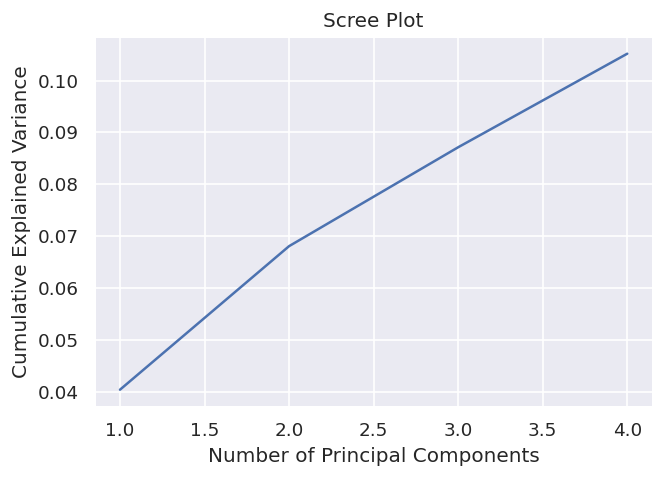

In [ ]:
from sklearn.decomposition import PCA
#Tạo mô hình PCA và chọn số lượng thành phần chính là 4
pca = PCA(n_components=4)
pca.fit(df_seg)

# Xem tỷ lệ phần trăm độ giải thích
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Vẽ biểu đồ cộng dồn của tỷ lệ phần trăm độ giải thích
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
plt.plot(range(1, 5), np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


Số lượng thành phần chính tối ưu nhất cho mô hình là 2   

In [ ]:
#Tạo mô hình PCA và chọn số lượng thành phần chính là 2
pca = PCA(n_components=2)
pca.fit(df_seg)

#Chuyển thành dạng dataframe
PCA_ds = pd.DataFrame(pca.transform(df_seg), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,36275.0,-7.835068e-19,2.316945,-2.789505,-0.791863,-0.466452,0.019386,20.940129
col2,36275.0,-1.557220e-16,1.919123,-3.809877,-1.513383,-0.127376,1.028938,8.578955


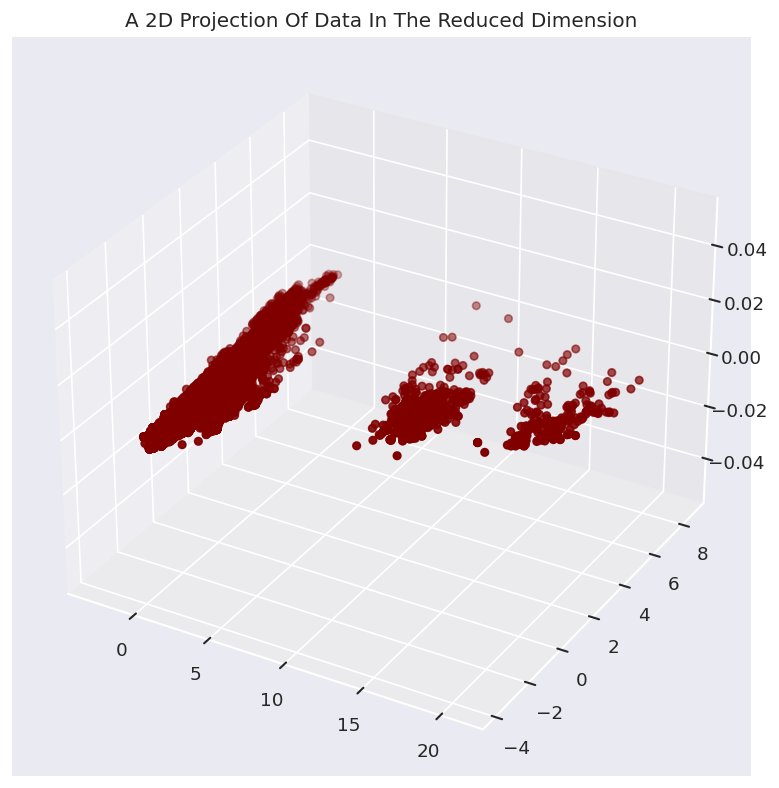

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

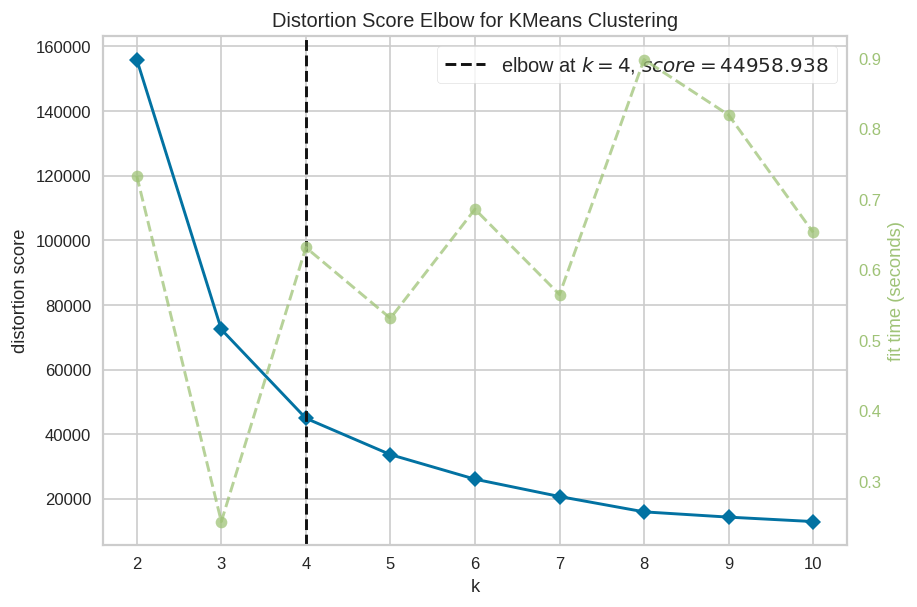

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

In [ ]:
#Adding the Clusters feature to the orignal dataframe.
df_seg["Segment"]= yhat_AC

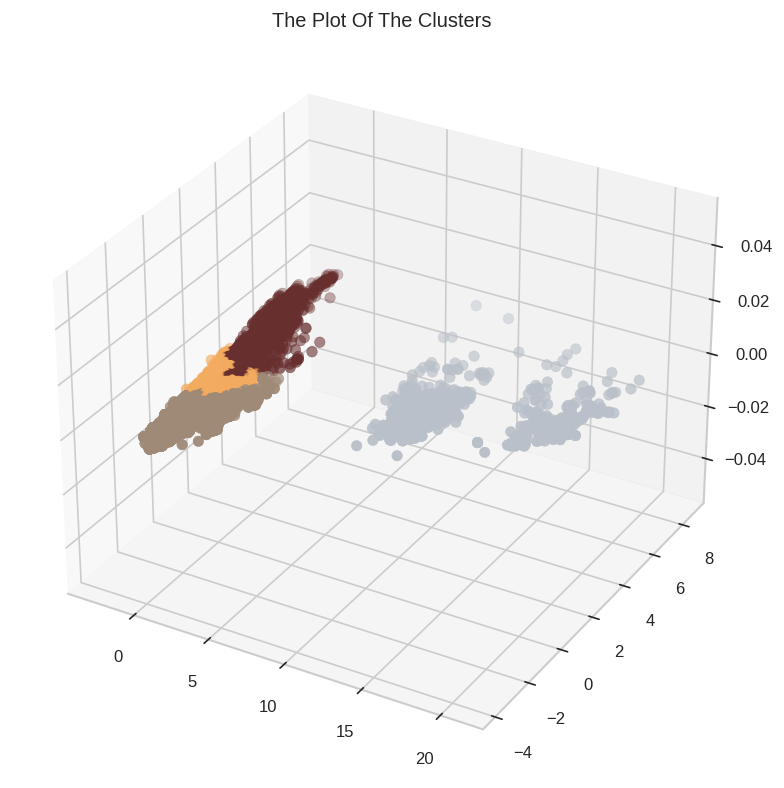

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"])

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, s=40, c=df_seg['Segment'], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")

plt.show()

**We will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.**

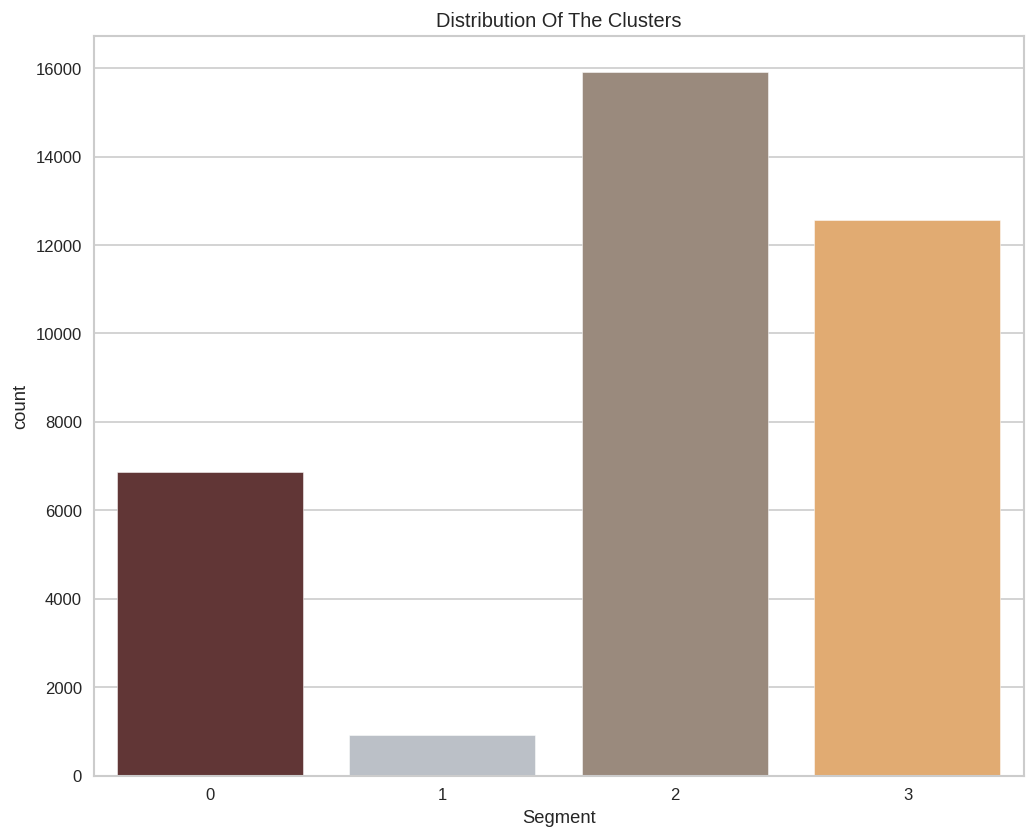

In [ ]:
#Plotting countplot of clusters
fig = plt.figure(figsize=(10,8))
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_seg['Segment'], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
#Count booking each segment
df_cluster = df_reserve.copy()
df_cluster['segment'] = df_seg['Segment']
df_cluster.groupby('segment').agg(avg_price=('avg_price_per_room', 'mean'), booking_status=('booking_status', 'count'))

,avg_price,booking_status
segment,,
0,137.981611,6864
1,65.589516,930
2,89.095419,15919
3,105.498716,12562


In [ ]:
df_cluster['booking_status'] = df['booking_status']

In [ ]:
df_cluster[categorical] = df_cluster[categorical].astype(str)

In [ ]:

from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over the columns and perform label encoding
for column in categorical:
    encoded_column = label_encoder.fit_transform(df_cluster[column])
    df_cluster[column] = encoded_column

In [ ]:
df_cluster.iloc[:,1:-1].columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<Figure size 960x660 with 0 Axes>

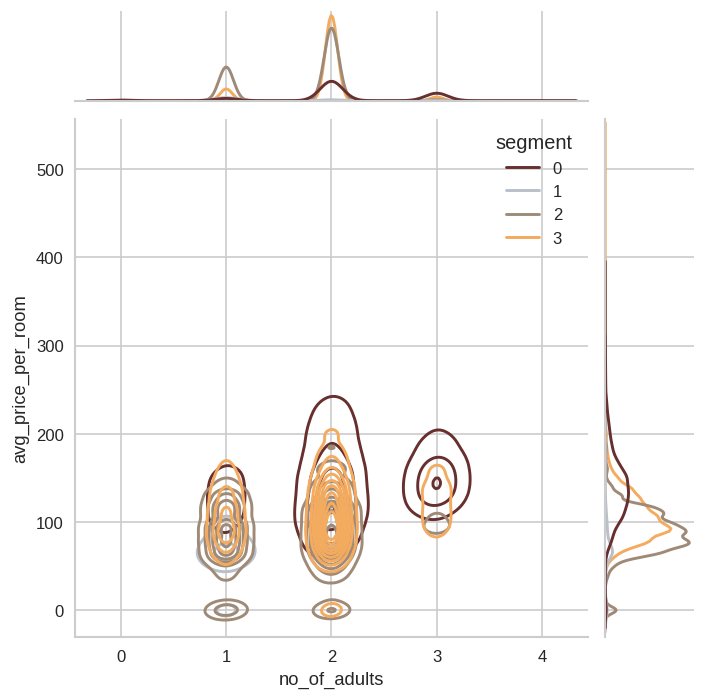

<Figure size 960x660 with 0 Axes>

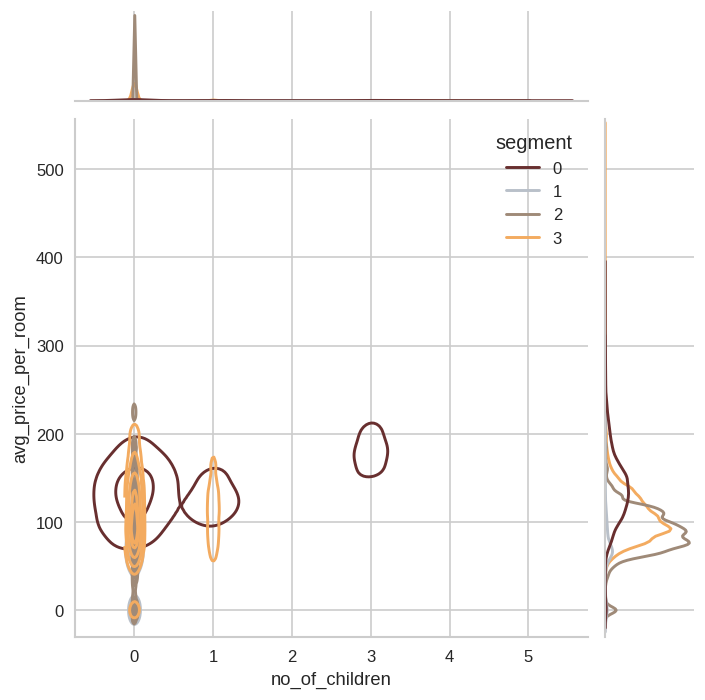

<Figure size 960x660 with 0 Axes>

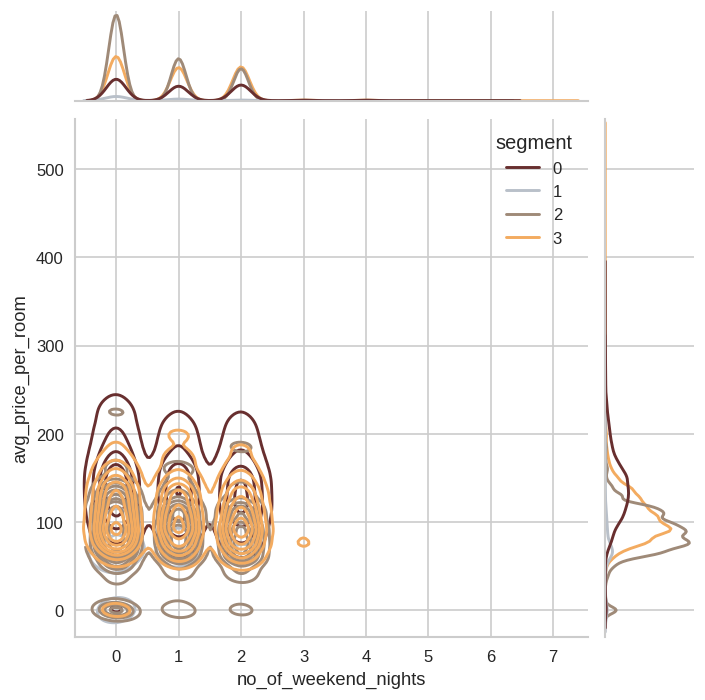

<Figure size 960x660 with 0 Axes>

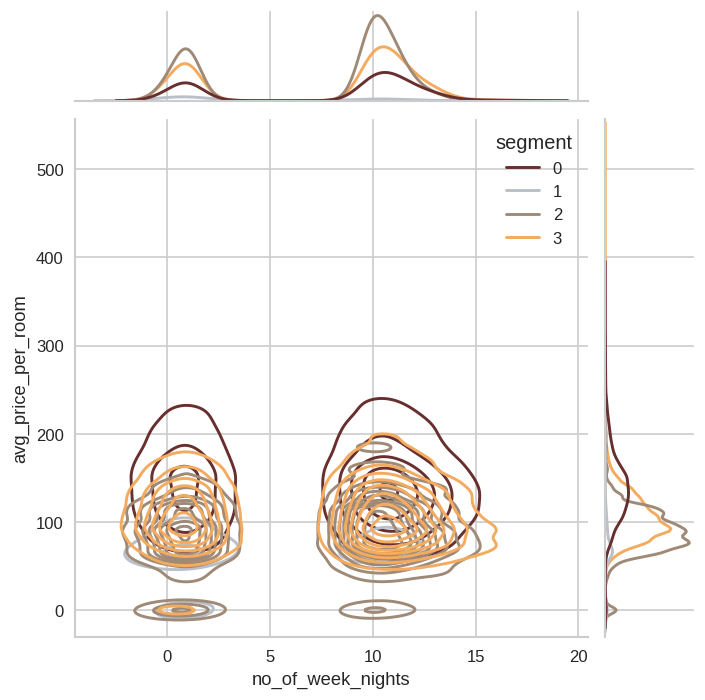

<Figure size 960x660 with 0 Axes>

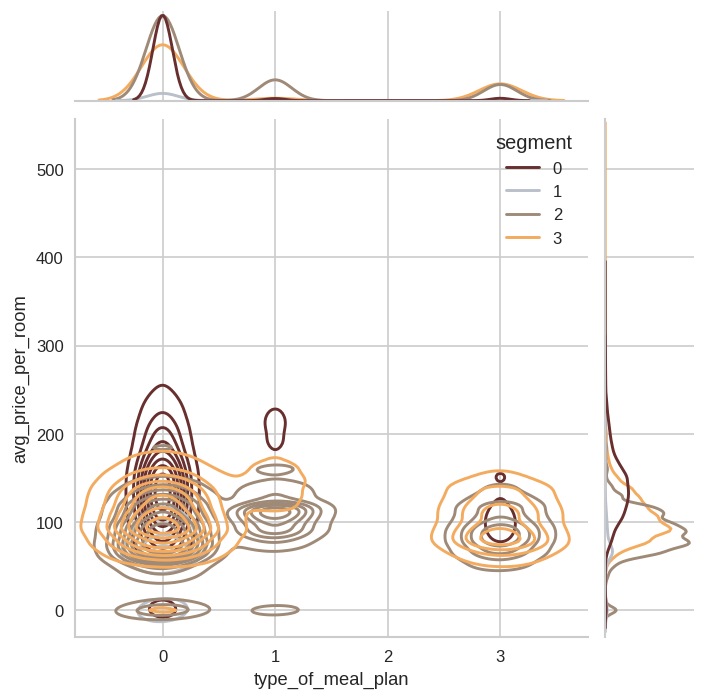

<Figure size 960x660 with 0 Axes>

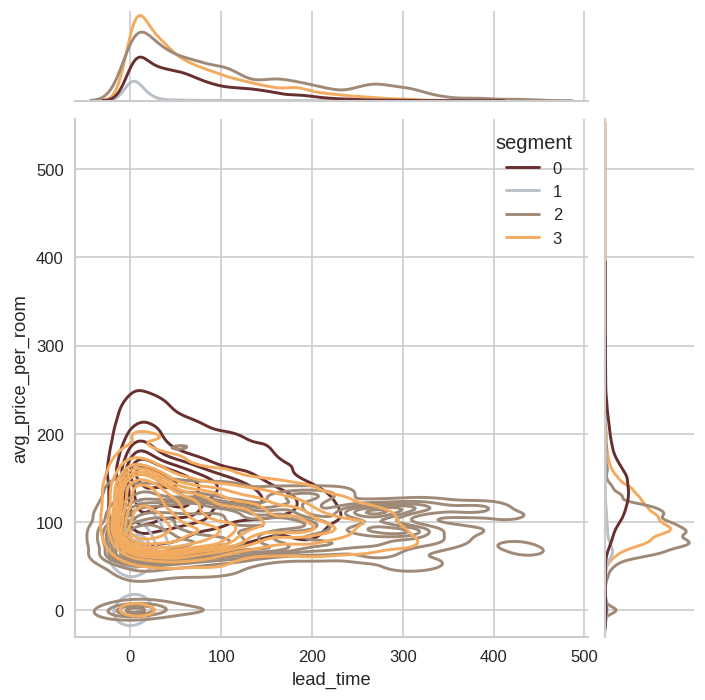

<Figure size 960x660 with 0 Axes>

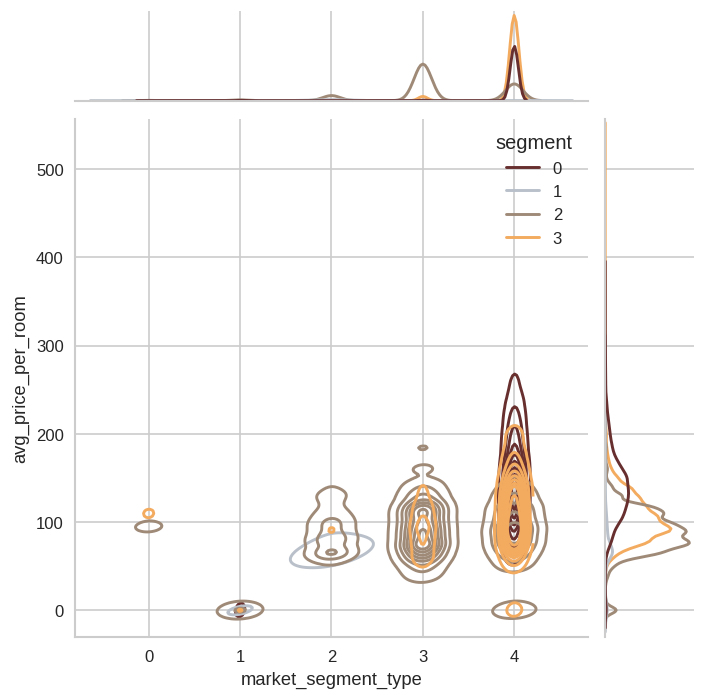

<Figure size 960x660 with 0 Axes>

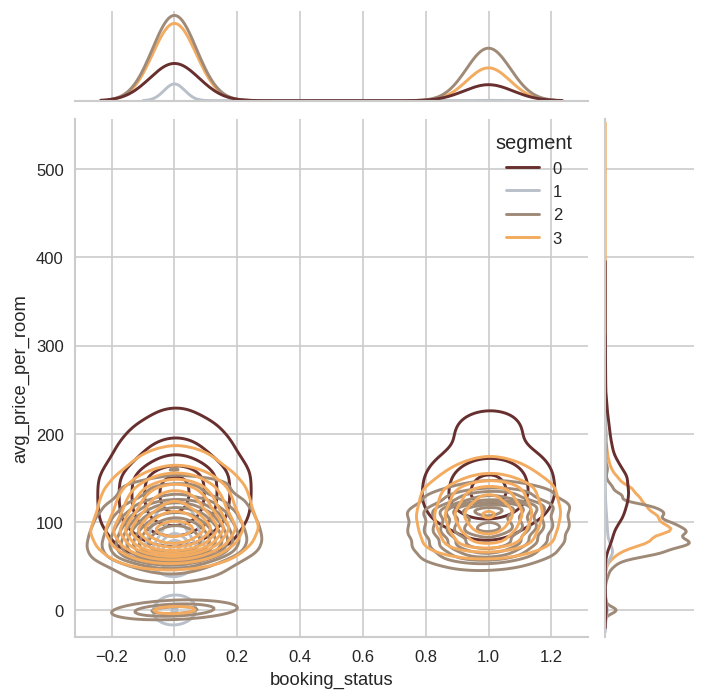

In [ ]:
profile = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights','no_of_week_nights', 'type_of_meal_plan','lead_time','market_segment_type','booking_status']
for i in df_cluster[profile]:
    plt.figure()
    sns.jointplot(x=df_cluster[i], y=df_cluster["avg_price_per_room"], hue =df_cluster["segment"], kind="kde", palette=pal)
    plt.show()

**About**
+ Segment 0:
  + chủ yếu là kênh online
  + meal plan 0
  + có mức avg_price cao nhất
+ Segment 1:
  + chủ yếu là Corporate
  + tỷ lệ cancelation rất thấp
+ Segment 2:
  + tập trung nhiều nhất kênh online và 1 phần ở offline
  + tỷ lệ cancelation cao
  + meal plan 3 và 0
  + có mức avg_price trung bình
  + có thể là các cặp đôi trẻ, không có children
  + các cá nhân  
+ Segment 3:
  + chủ yếu là kênh offline và một phần Corporate
  + meal plan 0 và 1
  + có mức avg_price trung bình
  + có thể là các cặp đôi trẻ, không có children
  + các cá nhân


#Model & Results

###**Data Cleaning**

In [ ]:
# Tạo bản sao data
df_pre = df.copy()

In [ ]:
# Xoá cột Booking ID
df_pre = df_pre.drop('Booking_ID',axis=1)

In [ ]:
df_pre.head()

,lead_time,avg_price_per_room,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,...,no_of_previous_bookings_not_canceled_9,repeated_guest_0,repeated_guest_1,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
0,224,65.00,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,5,106.68,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,60.00,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,211,100.00,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,48,94.50,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
df_pre['Segment'] = df_seg['Segment']

In [ ]:
df_pre.groupby('Segment').agg(avg_price=('avg_price_per_room', 'mean'), booking_status=('booking_status', 'count'))

,avg_price,booking_status
Segment,,
0,137.981611,6864
1,65.589516,930
2,89.095419,15919
3,105.498716,12562


In [ ]:
segment_counts = df_pre.groupby('Segment')['booking_status'].value_counts()
print(segment_counts)

Segment  booking_status
0        0                 4803
         1                 2061
1        0                  914
         1                   16
2        0                 9855
         1                 6064
3        0                 8818
         1                 3744
Name: booking_status, dtype: int64


In [ ]:
#df_pre_group = df_pre[df_pre['Segment'].isin([0, 2, 3])]

In [ ]:
#df_pre_group.sample()

##Predict Segment

---




###**Preprocessing**

In [ ]:
#Chuẩn bị data
df_pre_X = df_pre.drop('booking_status',axis=1)

In [ ]:
#Chuẩn bị data đã xong ta phân chia các tập train và test
from sklearn.model_selection import train_test_split
y = df_pre['booking_status'].values
X = df_pre_X.values #Không dùng cột booking_status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

###**Model**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
logical = LogisticRegression()
logical.fit(X_train,y_train)

LogisticRegression()

In [ ]:
logical_predict = logical.predict(X_test)

In [ ]:
acc_lr = accuracy_score(y_test,logical_predict)
f1_lr = f1_score(y_test,logical_predict)
prec_lr = precision_score(y_test,logical_predict)
rec_lr = recall_score(y_test,logical_predict)
results_lr = pd.DataFrame([['Logistic regression', acc_lr, f1_lr, prec_lr, rec_lr]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_lr

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic regression,0.803179,0.670563,0.753022,0.60438


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
nb_predict= naive_bayes.predict(X_test)

In [ ]:
acc_nb = accuracy_score(y_test,nb_predict)
f1_nb = f1_score(y_test,nb_predict)
prec_nb = precision_score(y_test,nb_predict)
rec_nb = recall_score(y_test,nb_predict)
results_nb = pd.DataFrame([['Naive Bayes', acc_nb, f1_nb, prec_nb, rec_nb]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_nb

,Model,Accuracy Score,F1 score,Precision,Recall
0,Naive Bayes,0.385647,0.5183,0.350141,0.997228


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier().fit(X_train,y_train)
knn_predict = knn.predict(X_test)

In [ ]:
acc_knn = accuracy_score(y_test,knn_predict)
f1_knn = f1_score(y_test,knn_predict)
prec_knn = precision_score(y_test,knn_predict)
rec_knn = recall_score(y_test,knn_predict)
results_knn = pd.DataFrame([['KNN', acc_knn, f1_knn, prec_knn, rec_knn]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_knn

,Model,Accuracy Score,F1 score,Precision,Recall
0,KNN,0.811265,0.691684,0.754173,0.638758


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state=42).fit(X_train, y_train)
forest_predict = forest.predict(X_test)

In [ ]:
acc_rf = accuracy_score(y_test,forest_predict)
f1_rf = f1_score(y_test,forest_predict)
prec_rf = precision_score(y_test,forest_predict)
rec_rf = recall_score(y_test,forest_predict)
results_rf = pd.DataFrame([['Random forest', acc_rf, f1_rf, prec_rf, rec_rf]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_rf

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random forest,0.876413,0.806,0.840048,0.774605


##**Results**

In [ ]:
results_seg = pd.concat([results_rf, results_knn, results_lr,results_nb])
results_sorted = results_seg.sort_values(by='Accuracy Score', ascending=False)
results_sorted

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random forest,0.876413,0.806000,0.840048,0.774605
0,KNN,0.811265,0.691684,0.754173,0.638758
0,Logistic regression,0.803179,0.670563,0.753022,0.604380
0,Naive Bayes,0.385647,0.518300,0.350141,0.997228


#Solution

**Một Vài Đề Xuất**

Chiến lược giá cả: Với việc phòng loại 1 được đặt nhiều nhất và giá trung bình xung quanh 100 euro, bạn có thể xem xét tăng giá cho loại phòng này để tối đa hóa lợi nhuận. Đồng thời, bạn cũng nên duy trì một số lượng phòng có giá thấp hơn để thu hút khách hàng giá trị và duy trì sự cạnh tranh.

Quản lý hủy đặt phòng: Với phát hiện rằng có sự tương quan giữa giá phòng và số ngày từ ngày đặt phòng đến ngày đến, bạn có thể áp dụng các chính sách hủy linh hoạt. Nếu khách hàng đặt phòng loại phòng đắt đỏ hoặc đặt trước lâu hơn, bạn có thể áp dụng các điều khoản hủy phù hợp để giảm thiểu việc hủy đặt phòng và đảm bảo thu nhập ổn định.

Tăng cường tiếp thị cho gói bữa ăn: Với phát hiện rằng hầu như không ai chọn gói bữa ăn 2 hoặc 3, bạn có thể tăng cường tiếp thị và quảng bá cho những lợi ích của các gói bữa ăn này. Cung cấp ưu đãi đặc biệt hoặc mở rộng lựa chọn bữa ăn có thể thu hút khách hàng và tăng doanh thu từ dịch vụ ăn uống.

Hướng đến cặp đôi không có con: Với giả định rằng hầu hết người đến là các cặp M+W không có con, bạn có thể tạo ra các gói dịch vụ và trải nghiệm hướng đến đối tượng này. Cung cấp các gói ưu đãi lãng mạn hoặc các hoạt động giải trí dành riêng cho cặp đôi có thể thu hút và tạo ra trải nghiệm đáng nhớ cho khách hàng.